In [1]:
import sys
import geoopt
import torch
import numpy as np
import pytest

import matplotlib.pyplot as plt

Use `geoopt` to do line search optimization where parameters are constrained to manifolds. 

As example we will try to find the basis of a matrix $A$ in which it has the smallest 1-norm by minimizing $\|XAY\|_1$ where $X,Y$ are orthogonal

AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA
AAAAA


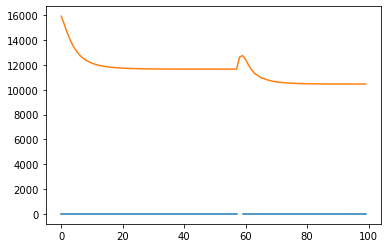

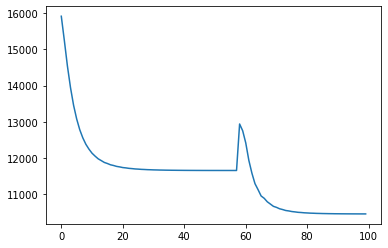

In [2]:
(n,m) = (100,200)
A = torch.randn(n,m)
stiefel = geoopt.manifolds.Stiefel()
X = stiefel.random((n,n))
X.requires_grad=True
Y = stiefel.random((m,m))
Y.requires_grad=True

def closure():
    optim.zero_grad()

    loss = (X@A@Y).norm(p=1)
    loss.backward()

    return loss.item()

optim = geoopt.optim.RiemannianLineSearch([X,Y])
losses = []
losses2 = []
for i in range(100):
    losses.append(optim.step(closure))
    losses2.append(closure())
plt.plot(optim.step_size_history)
plt.plot(losses)
plt.figure()
plt.plot(losses2)

In [3]:
optim.step_size_history

[0.0021584862984156718,
 0.00019082638036882298,
 0.0002944036826462469,
 0.00026639876878292577,
 0.0002031647079835459,
 0.00016180885055309697,
 0.00011878579987654165,
 9.764194605772993e-05,
 7.186514326765024e-05,
 6.0633158318672374e-05,
 4.338348422419457e-05,
 4.03235512691725e-05,
 2.762719273465995e-05,
 2.8476959733441766e-05,
 1.671483375409929e-05,
 2.0915632619381355e-05,
 9.56377924710851e-06,
 1.6109612953736058e-05,
 6.228960002604028e-06,
 1.1491302929086035e-05,
 4.5901096307520466e-06,
 8.016160019527349e-06,
 3.0253330800671826e-06,
 5.727695197369258e-06,
 2.487897492559208e-06,
 4.201580118100894e-06,
 1.68123526893706e-06,
 3.052969140219271e-06,
 1.2456718350400937e-06,
 2.2966279411527715e-06,
 8.886276054345768e-07,
 1.6185321522322471e-06,
 6.753896993115208e-07,
 1.2054391058750753e-06,
 4.822742083796787e-07,
 8.853422364200978e-07,
 3.6655102702094673e-07,
 6.976634468250187e-07,
 2.2129479018127932e-07,
 4.730034323822782e-07,
 2.777276754026919e-07,
 3